In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')                    

In [221]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 解决画图中显示不出中文的问题

In [223]:
# （1）加载数据
import os 
os.chdir('D:\\工作\\*')
file1 = pd.read_excel('经纪人得分明细.xlsx', sheetname=0, header=0)
print('加载数据%i条' %len(file1))
# print(file1.head())

加载数据2774条


In [121]:
# （2）清洗数据（删除缺失值，删除异常值），选出需要指标
data1 = file1[['分公司','门店','经纪人工号','经纪人姓名','合计渗透量','客户发起聊天量','1分钟响应量','商机量','录入量','单量']]
data1.dropna(inplace=True)
data1 = data1[data1['商机量'] >= 6]                 # 商机量≥6个，才能参与评选

None


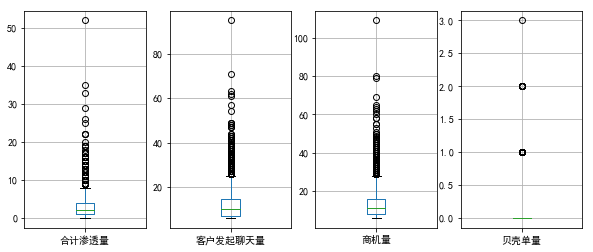

In [122]:
#创建函数f1,制作箱型图，查看异常值；

def f1():
    fig,axes = plt.subplots(1,4,figsize = (10,4))
    data1.boxplot(column = ['合计渗透量'], ax = axes[0])
    data1.boxplot(column = ['客户发起聊天量'], ax = axes[1])
    data1.boxplot(column = ['商机量'], ax = axes[2])
    data1.boxplot(column = ['单量'], ax = axes[3])
print(f1())

In [118]:
#创建函数f2，清除异常值；

def f2(data1, col):
    q1 = data1[col].quantile(q = 0.25)
    q3 = data1[col].quantile(q = 0.75)
    iqr = q3-q1
    t1 = q1 - 3*iqr
    t2 = q3 + 3*iqr
    return data1[(data1[col] > t1) & (data1[col] < t2)][['分公司','经纪人工号', col]] 
#要筛选出一个单独的数据

In [133]:
data_st = f2(data1, '合计渗透量')
data_ltl = f2(data1, '客户发起聊天量')
data_1min = f2(data1, '1分钟响应量')
data_sjl = f2(data1, '商机量')
data_lrl = f2(data1, '录入量')
data_dl = data1[['分公司','经纪人工号','贝壳单量']]    # 数据太特殊，全是异常了，所以这样直接取


In [224]:
data = pd.merge(data_st,data_ltl,on =['分公司','经纪人工号'])
data = pd.merge(data,data_1min,on =['分公司','经纪人工号'])
data = pd.merge(data,data_sjl,on =['分公司','经纪人工号'])
data = pd.merge(data,data_lrl,on =['分公司','经纪人工号'])
data = pd.merge(data,data_dl,on =['分公司','经纪人工号'])
# print(data.head())
# how ='left'

In [181]:
# （3）按照各指标规则定制得分

data['渗透量得分'] = 0.4*data['合计渗透量']/6
data['响应率得分'] = 0.2*data['客户发起聊天量']/data['1分钟响应量']/0.75
data['录入率得分'] = 0.2*data['客户发起聊天量']/data['1分钟响应量']/0.15
data['成交得分'] = 0.2*data['贝壳单量']*5
data['综合得分'] = data['渗透量得分']+data['响应率得分']+data['录入率得分']+data['成交得分']

In [218]:
data.sort_values(['分公司','综合得分'],ascending = True)
# 排序

,分公司,经纪人工号,合计渗透量,客户发起聊天量,1分钟响应量,商机量,录入量,贝壳单量,渗透量得分,响应率得分,录入率得分,成交得分,综合得分
2229,成都东西南北房地产经纪有限公司,1000119628,0,6,6,7,0,0,0.000000,0.266667,1.333333,0.0,1.600000
2331,成都东西南北房地产经纪有限公司,1000119630,0,9,8,10,0,0,0.000000,0.300000,1.500000,0.0,1.800000
1593,成都东西南北房地产经纪有限公司,1000119659,0,17,14,14,2,0,0.000000,0.323810,1.619048,0.0,1.942857
2423,成都东西南北房地产经纪有限公司,1000119646,0,7,5,6,0,0,0.000000,0.373333,1.866667,0.0,2.240000
2519,成都东西南北房地产经纪有限公司,1000119702,0,7,3,8,0,0,0.000000,0.622222,3.111111,0.0,3.733333
1448,成都富房天策房地产营销策划有限公司,1000106846,0,6,6,7,1,0,0.000000,0.266667,1.333333,0.0,1.600000
316,成都富房天策房地产营销策划有限公司,1000044921,2,7,7,8,3,0,0.133333,0.266667,1.333333,0.0,1.733333
301,成都富房天策房地产营销策划有限公司,1000098410,3,7,7,11,4,0,0.200000,0.266667,1.333333,0.0,1.800000
2352,成都富房天策房地产营销策划有限公司,1000093356,0,7,6,9,0,0,0.000000,0.311111,1.555556,0.0,1.866667
1698,成都富房天策房地产营销策划有限公司,1000047481,4,6,6,7,0,0,0.266667,0.266667,1.333333,0.0,1.866667


In [219]:
data_01 = data[data['分公司'] == '品牌1].head(20)
data_02 = data[data['分公司'] == '品牌2'].head(5)
data_03 = data[data['分公司'] == '品牌3'].head(10)
data_04 = data[data['分公司'] == '品牌4'].head(8)
data_05 = data[data['分公司'] == '品牌5'].head(7)

#得出每个公司按照经纪人得分排名

print(data_01)
print(data_02)
print(data_03)
print(data_04)
print(data_05)

        分公司     经纪人工号  合计渗透量  客户发起聊天量  1分钟响应量  商机量  录入量  贝壳单量     渗透量得分  \
0   成都链家事业部  20167874      4       16      11   17    3     3  0.266667   
2   成都链家事业部  20106817      7       13      10   13    4     2  0.466667   
3   成都链家事业部  23035736      5       18      18   19    6     2  0.333333   
4   成都链家事业部  23024491      3        7       7    6    4     1  0.200000   
5   成都链家事业部  20145970      9       15      13   13    6     1  0.600000   
6   成都链家事业部  23001570      5        8       7    9    5     1  0.333333   
7   成都链家事业部  26035233      4       22      18   22    4     2  0.266667   
8   成都链家事业部  20375326      2       16      13   19    4     2  0.133333   
9   成都链家事业部  23116339      6        6       5    6    3     1  0.400000   
11  成都链家事业部  20335190      2       16      11   15    2     2  0.133333   
12  成都链家事业部  20105622      5        9       6   11    5     1  0.333333   
13  成都链家事业部  23031494      7        7       6    8    3     1  0.466667   
14  成都链家事业部  23091820    